In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Introduction Pymoo: An Multi-objective Optimization Toolbox in Python


In [82]:
# installation
!pip install -U pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


![](https://raw.githubusercontent.com/mikelzc1990/nasbench101/master/pymoo_arch.png)

In [83]:
import numpy as np
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.decomposition.asf import ASF
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.visualization.scatter import Scatter
from pymoo.mcdm.high_tradeoff import HighTradeoffPoints
from pymoo.util.ref_dirs import get_reference_directions

## An Example Bi-objective Problem (Welded Beam)

![](https://raw.githubusercontent.com/mikelzc1990/nasbench101/master/image15.png)

In [87]:
# First define the problem

# problem = get_problem("welded_beam")
problem = get_problem("tnk")

print("Number of decision variables: {}".format(problem.n_var))
print("Number of objectives: {}".format(problem.n_obj))
print("Number of constraints: {}".format(problem.n_constr))

Number of decision variables: 2
Number of objectives: 2
Number of constraints: 2


In [88]:
# Then define the algorithm, e.g., NSGA-II, MOEA/D, etc.

## NSGA-II
algorithm = NSGA2(pop_size=100)
# ## MOEA/D
# ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=99)
# algorithm = MOEAD(ref_dirs)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      igd      |       gd      |       hv     
     1 |      100 |      2 |  0.000000E+00 |  7.0592493221 |  0.4207731496 |  0.1391529706 |  0.0767719243
     2 |      200 |      4 |  0.000000E+00 |  1.1737816796 |  0.2153340993 |  0.0856399030 |  0.1238055108
     3 |      300 |      7 |  0.000000E+00 |  0.2158393232 |  0.1573338822 |  0.1078738521 |  0.1586127279
     4 |      400 |     11 |  0.000000E+00 |  0.0399574099 |  0.1077729238 |  0.0606239231 |  0.1879251415
     5 |      500 |     10 |  0.000000E+00 |  0.000000E+00 |  0.1034253367 |  0.0245026686 |  0.2270864292
     6 |      600 |     17 |  0.000000E+00 |  0.000000E+00 |  0.0573729631 |  0.0348180664 |  0.2465330950
     7 |      700 |     21 |  0.000000E+00 |  0.000000E+00 |  0.0389164505 |  0.0298402867 |  0.2666282843
     8 |      800 |     21 |  0.000000E+00 |  0.000000E+00 |  0.0362086942 |  0.0243318553 |  0.2693435146
     9 |      900 |     21 |  0.00000

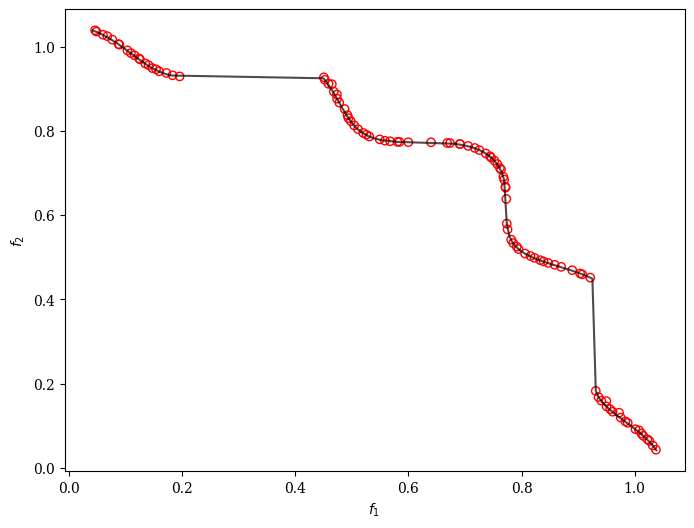

In [89]:
# Kick-off the optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

## Decision Making

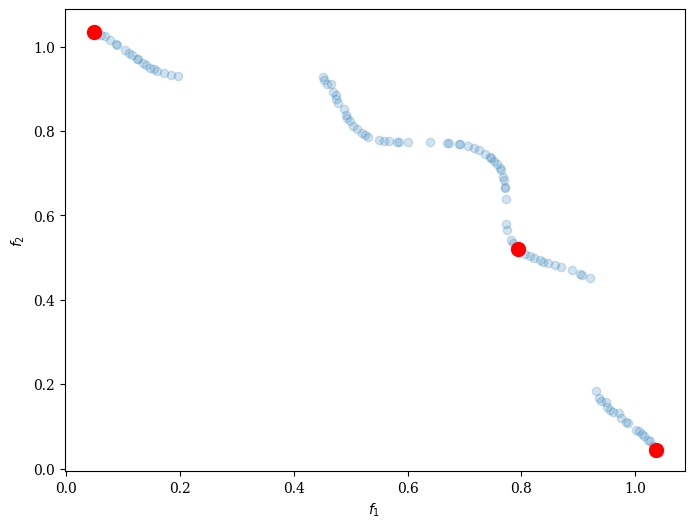

In [90]:
# Without any preference
dm = HighTradeoffPoints()
I = dm(res.F)

plot = Scatter()
plot.add(res.F, alpha=0.2)
plot.add(res.F[I], color="red", s=100)
plot.show()

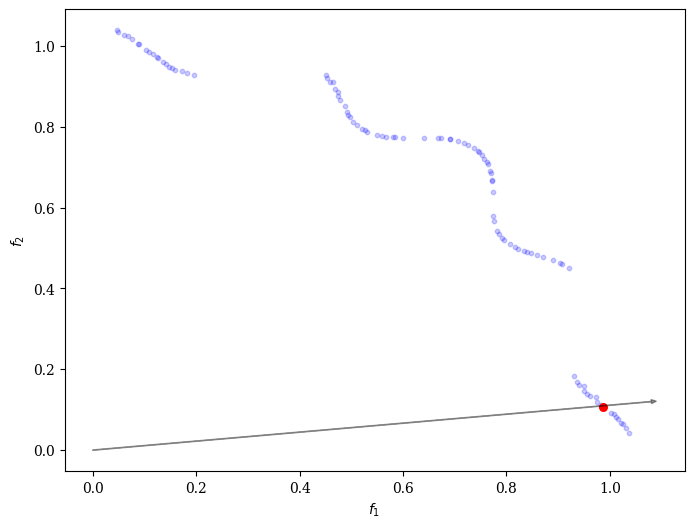

In [92]:
# With preference: say both objectives are equally important
weights = np.array([0.9, 0.1])
decomp = ASF()
I = decomp(res.F, weights).argmin()

plot = Scatter()
plot.add(res.F, color="blue", alpha=0.2, s=10)
plot.add(res.F[I], color="red", s=30)
plot.do()
plot.apply(lambda ax: ax.arrow(0, 0, 1.2*weights[0], 1.2*weights[1], color='black',
                               head_width=0.01, head_length=0.01, alpha=0.4))
plot.show()

# An Example Tri-objective Problem

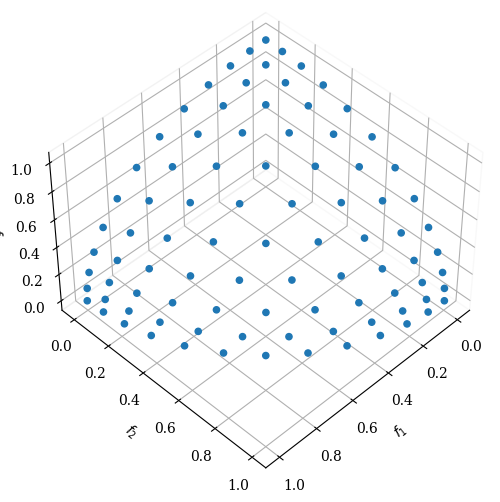

In [80]:
from pymoo.algorithms.moo.nsga3 import NSGA3

problem = get_problem("dtlz2")
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
algorithm = NSGA3(pop_size=92, ref_dirs=ref_dirs)

res = minimize(problem,
               algorithm,
               seed=1,
               termination=('n_gen', 600))

Scatter().add(res.F).show()

## Define your own problem

In [93]:
from pymoo.core.problem import Problem

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=1, n_obj=2, vtype=float)
        self.xl = np.zeros(self.n_var)
        self.xu = np.ones(self.n_var)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x
        f2 = 1-x

        out["F"] = np.column_stack([f1, f2])

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |    100 |             - |             -
     2 |      200 |    100 |  0.0051327988 |         ideal
     3 |      300 |    100 |  0.0032051211 |             f
     4 |      400 |    100 |  0.0017590520 |             f
     5 |      500 |    100 |  0.0044816205 |         ideal
     6 |      600 |    100 |  0.0022051173 |             f
     7 |      700 |    100 |  0.0030179362 |             f
     8 |      800 |    100 |  0.0018623728 |             f
     9 |      900 |    100 |  0.0033532239 |             f
    10 |     1000 |    100 |  0.0019989564 |             f


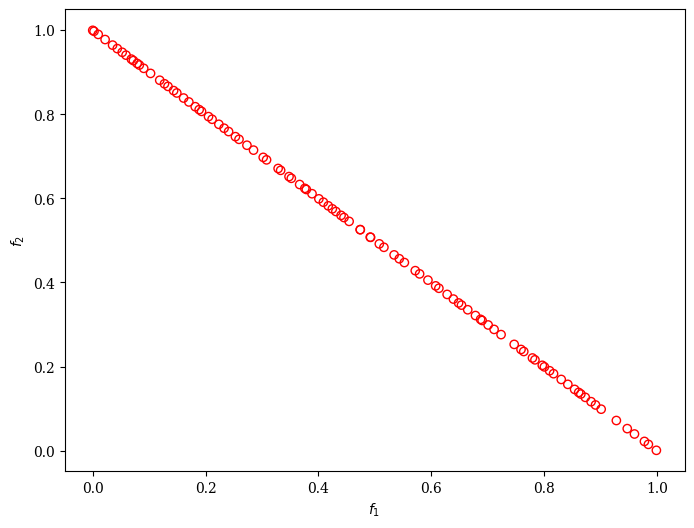

In [94]:
problem = MyProblem()

res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

## Create your own EMO algorithm

In [57]:
from pymoo.algorithms.base.genetic import GeneticAlgorithm
from pymoo.algorithms.moo.nsga2 import *


class MyEMOAlgorithm(GeneticAlgorithm):

    def __init__(self,
                 pop_size=100,
                 sampling="How do you initialize a population",
                 selection="How do you select parents",
                 crossover="How do you exchange information between parents to make new offspring",
                 mutation="How do you alter a solution",
                 survival="How do you select a subset solutions from population",
                 output=MultiObjectiveOutput(),
                 **kwargs):

        super().__init__(
            pop_size=pop_size,
            sampling=sampling,
            selection=selection,
            crossover=crossover,
            mutation=mutation,
            survival=survival,
            output=output,
            advance_after_initial_infill=True,
            **kwargs)

        self.termination = DefaultMultiObjectiveTermination()
        self.tournament_type = 'comp_by_dom_and_crowding'

    def _set_optimum(self, **kwargs):
        if not has_feasible(self.pop):
            self.opt = self.pop[[np.argmin(self.pop.get("CV"))]]
        else:
            self.opt = self.pop[self.pop.get("rank") == 0]

In [ ]:
algorithm = MyEMOAlgorithm(pop_size=100)

problem = get_problem("tnk")

res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

# Introduction to EvoXBench

In this notebook, we will demonstrate
- how to install EvoXBench
- the basics of EvoXBench

**[EvoXBench](https://arxiv.org/abs/2208.04321)** is an efficient platform
for facilitating neural architecture search (NAS)
without the requirement of *GPUs* or
sophisticated deep learning packages, such as *PyTorch, TensorFlow*, etc.

![](https://raw.githubusercontent.com/EMI-Group/evoxbench/main/assets/evoxbench_overview.png)

## 1. Preparation
Let's perform the following steps to have EvoXBench properly installed.

First, download the following two files:
- ``database_xxx.zip`` from [Google Drive](https://drive.google.com/file/d/11bQ1paHEWHDnnTPtxs2OyVY_Re-38DiO/view?usp=sharing) or [Baidu NetDisk](https://pan.baidu.com/s/1PwWloA543-81O-GFkA7GKg)
- ``data_xxx.zip`` from [Google Drive](https://drive.google.com/file/d/1fUZtpTjfEQao2unLKaspL8fOq4xdSXt2/view?usp=sharing) or [Baidu NetDisk](https://pan.baidu.com/s/1yopkISKyjbWIHXFV_Op3pg)

Second, unzip these two files and find their paths
- my ``database`` and ``data`` are unzipped to:
```python
    # /Users/luzhicha/Dropbox/2023/github/evoxbench/
    # └─ database/
    # |  |  __init__.py
    # |  |  db.sqlite3
    # |  |  ...
    # |
    # └─ data/
    #    └─ darts/
    #    └─ mnv3/
    #    └─ ...
```



In [95]:
print('Installing EvoXBench...')
! pip install evoxbench 1>/dev/null
# ! pip install git+https://github.com/EMI-Group/evoxbench

Installing EvoXBench...


In [96]:
from google.colab import drive
drive.mount('/content/drive')

# !unzip drive/MyDrive/database20220713.zip
# !unzip drive/MyDrive/data20221028.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
print('Configurating EvoXBench...')
from evoxbench.database.init import config
# make sure you update these two paths accordingly, and the first path should be for database file
config("database", "data")

Configurating EvoXBench...
Configuration Succeed!


Good! Now we have successfully installed and configured **EvoXBench**. Let's now get started with some quick examples.

# 2.1 How to create a NAS benchmark (search space)

**EvoXBench** currently supports the following seven search spaces

| $\Omega$ | $D$ | $|\Omega|$ | Objectives | Dataset |
|:-:|:-:|:-:|:-:|:-:|
| [NB101](https://github.com/google-research/nasbench) | 26 |423K | $f^{e}$, ${f}^{c}$ | CIFAR-10 |
| [NB201](https://github.com/D-X-Y/NAS-Bench-201) | 6 | 15.6K | $f^{e}$, ${f}^{c}$, ${f}^{\mathcal{H}}$ | CIFAR-10 |
| [NATS](https://github.com/D-X-Y/NATS-Bench) | 5 | 32.8K | $f^{e}$, ${f}^{c}$, ${f}^{\mathcal{H}}$ | CIFAR-10 |
| [DARTS](https://github.com/automl/nasbench301) | 32 | $\sim10^{21}$ | $f^{e}$, ${f}^{c}$ | CIFAR-10 |
| [ResNet-50](https://github.com/mit-han-lab/once-for-all) | 25 | $\sim10^{14}$ | $f^{e}$, ${f}^{c}$ | ImageNet-1K |
| [Transformer](https://github.com/microsoft/Cream/tree/main/AutoFormer) | 34 | $\sim10^{14}$ | $f^{e}$, ${f}^{c}$ | ImageNet-1K |
| [MNV3](https://github.com/mit-han-lab/once-for-all) | 21 | $\sim10^{20}$ | $f^{e}$, ${f}^{c}$, ${f}^{\mathcal{H}}$ | ImageNet-1K |


In [98]:
# NAS-Bench-101 search space
from evoxbench.benchmarks import NASBench101Benchmark
objs = 'err&params'  # ['err&params', 'err&flops', 'err&params&flops']
benchmark = NASBench101Benchmark(objs=objs, normalized_objectives=False)
print("Benchmaking on NB101 search space with objectives: {}".format(objs))

# # NAS-Bench-201 search space
# from evoxbench.benchmarks import NASBench201Benchmark
# # hardware = 'edgegpu'  # ['edgegpu', 'raspi4', 'edgetpu', 'pixel3', 'eyeriss', 'fpga']
# # ['err&params', 'err&flops', 'err&latency', 'err&params&flops', 'err&params&latency', ...]
# objs = 'err&params&flops&edgegpu_latency&edgegpu_energy'
# benchmark = NASBench201Benchmark(objs=objs, normalized_objectives=False)
# print("Benchmaking on NB201 search space with objectives: {}".format(objs))

# # NATS size search space
# from evoxbench.benchmarks import NATSBenchmark
# objs = 'err&params&flops&latency'
# # ['err&params', 'err&flops', 'err&latency', 'err&params&flops', 'err&params&latency', ...]
# benchmark = NATSBenchmark(objs=objs, normalized_objectives=False)
# print("Benchmaking on NATS search space with objectives: {}".format(objs))

# # DARTS search space
# from evoxbench.benchmarks import DARTSBenchmark
# objs = 'err&params'  # ['err&params', 'err&flops', 'err&params&flops']
# benchmark = DARTSBenchmark(objs=objs, normalized_objectives=False)
# print("Benchmaking on DARTS search space with objectives: {}".format(objs))

Benchmaking on NB101 search space with objectives: err&params


# 2.2 How to evaluate an architecture

In [100]:
# let's randomly create N architectures
N = 5
archs = benchmark.search_space.sample(N)
print('Randomly create {} architectures:'.format(N))
print(archs)

Randomly create 5 architectures:
[{'matrix': array([[0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]]), 'ops': ['input', 'conv1x1-bn-relu', 'conv3x3-bn-relu', 'maxpool3x3', 'maxpool3x3', 'conv1x1-bn-relu', 'output']}, {'matrix': array([[0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]]), 'ops': ['input', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'conv3x3-bn-relu', 'conv1x1-bn-relu', 'conv1x1-bn-relu', 'output']}, {'matrix': array([[0, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]]), 'ops': ['input', 'conv3x3-bn-relu', 'conv3x3-bn-relu', 'max

In [101]:
# encode architecture (phenotype) to decision variables (genotypes)
X = benchmark.search_space.encode(archs)
print('Encode architectures to decision variables X: ')
print(X)

Encode architectures to decision variables X: 
[[0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 2 2 1]
 [1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1]
 [1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 2 2 0]
 [1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 2 0 2 1 0]
 [1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 2 0 2 1]]


In [102]:
# Evaluate the objective values
# if true_eval is True, return mean TEST accuracy over multiple runs,
# should only be used for final comparison.
true_eval = True
F = benchmark.evaluate(X, true_eval=true_eval)
print("Evaluating architectures for objectives: {}".format(objs))
print(F)

Evaluating architectures for objectives: err&params
[[1.00727836e-01 1.10514020e+07]
 [7.09802310e-02 4.16602600e+06]
 [6.69070482e-02 9.16852200e+06]
 [9.73557631e-02 1.01776740e+07]
 [1.10076129e-01 1.40404200e+06]]


# Let's define the multi-objective NAS problem

In [103]:
# some utility functions

from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair


def get_genetic_operator(crx_prob=1.0,  # crossover probability
                         crx_eta=30.0,  # SBX crossover eta
                         mut_prob=0.9,  # mutation probability
                         mut_eta=20.0,  # polynomial mutation hyperparameter eta
                         ):
    sampling = IntegerRandomSampling()
    crossover = SBX(prob=crx_prob, eta=crx_eta, repair=RoundingRepair(), vtype=int)
    mutation = PM(prob=mut_prob, eta=mut_eta, repair=RoundingRepair(), vtype=int)
    return sampling, crossover, mutation

def get_benchmark_settings(n_obj):
    n_gen = 100

    if n_obj == 2:
        ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=99)
    elif n_obj == 3:
        ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=13)
    elif n_obj == 4:
        ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=7)
    elif n_obj == 5:
        ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=5)
    elif n_obj == 6:
        ref_dirs = get_reference_directions(
            "multi-layer",
            get_reference_directions("das-dennis", n_obj, n_partitions=4, scaling=1.0),
            get_reference_directions("das-dennis", n_obj, n_partitions=1, scaling=0.5))
    elif n_obj == 8:
        ref_dirs = get_reference_directions(
            "multi-layer",
            get_reference_directions("das-dennis", n_obj, n_partitions=3, scaling=1.0),
            get_reference_directions("das-dennis", n_obj, n_partitions=2, scaling=0.5))
    else:
        raise NotImplementedError

    pop_size = ref_dirs.shape[0]

    return pop_size, n_gen, ref_dirs


In [104]:
# define the NAS problem using Pymoo
class MONASProblem(Problem):
    def __init__(self,
                 benchmark,
                 **kwargs):
        super().__init__(n_var=benchmark.search_space.n_var,
                         n_obj=benchmark.evaluator.n_objs,
                         n_constr=0, xl=benchmark.search_space.lb,
                         xu=benchmark.search_space.ub,
                         type_var=np.int64, **kwargs)

        self.benchmark = benchmark

    def _evaluate(self, x, out, *args, **kwargs):

        F = self.benchmark.evaluate(x, true_eval=True)

        out["F"] = F

In [105]:
# define the EMO algorithm
def nsga2(pop_size,
          crx_prob=1.0,  # crossover probability
          crx_eta=30.0,  # SBX crossover eta
          mut_prob=0.9,  # mutation probability
          mut_eta=20.0,  # polynomial mutation hyperparameter eta
          ):

    sampling, crossover, mutation = get_genetic_operator(crx_prob, crx_eta, mut_prob, mut_eta)

    return NSGA2(pop_size=pop_size, sampling=sampling, crossover=crossover,
        mutation=mutation, eliminate_duplicates=True)

# Now we are ready to kick off the search

In [106]:
problem = MONASProblem(benchmark)
pop_size, n_gen, ref_dirs = get_benchmark_settings(problem.n_obj)

algorithm = nsga2(pop_size)

res = minimize(problem, algorithm, ('n_gen', n_gen), verbose=True)

F = benchmark.evaluate(res.X, true_eval=True)  # re-evaluate the final population for test accuracy

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     10 |             - |             -
     2 |      200 |     19 |  0.0076539493 |             f
     3 |      300 |     30 |  0.2524221729 |         nadir
     4 |      400 |     36 |  0.0052477525 |             f
     5 |      500 |     49 |  0.0015957242 |             f
     6 |      600 |     55 |  0.0034429507 |             f
     7 |      700 |     79 |  0.0001861469 |             f
     8 |      800 |     96 |  0.0005090910 |             f
     9 |      900 |    100 |  0.0009492900 |             f
    10 |     1000 |    100 |  0.0009492900 |             f
    11 |     1100 |    100 |  0.0009492900 |             f
    12 |     1200 |    100 |  0.0009492900 |             f
    13 |     1300 |    100 |  0.0009900877 |             f
    14 |     1400 |    100 |  0.0014215379 |             f
    15 |     1500 |    100 |  0.0019102653 |             f
    16 |     1600 |    100 |  0.0015685940 |            

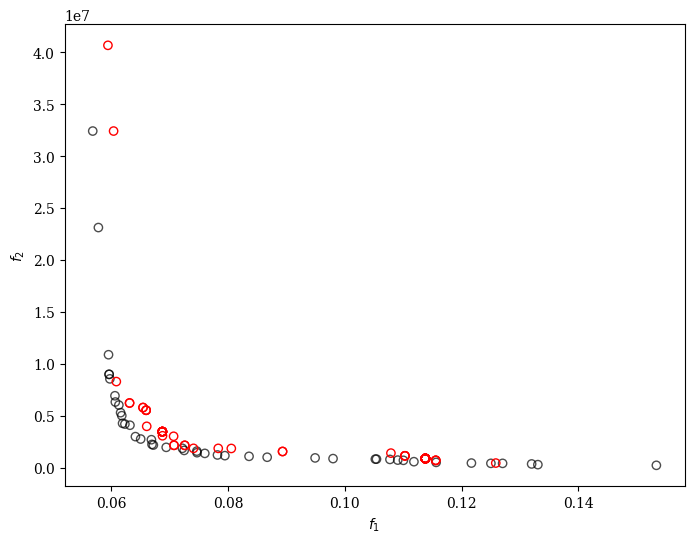

In [107]:
# calculate performance metrics
hv = benchmark.calc_perf_indicator(res.X, 'hv')

# visualize the solutions
plot = Scatter()
pf = benchmark.pareto_front
sort_idx = np.argsort(pf[:, 0])

# plot.add(pf[sort_idx], plot_type="line", color="black", alpha=0.7)
plot.add(pf[sort_idx], facecolor="none", edgecolor="black", alpha=0.7)

plot.add(F, facecolor="none", edgecolor="red")
plot.show()